In [573]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import feature, io, filters, measure, color
from skimage.morphology import watershed
from scipy import ndimage as ndi
%matplotlib inline

In [117]:
def normalise(inData):
    """
    Normalise array.
    """
    inDataAbs = np.fabs(inData)
    inDataMax = np.amax(inData)
    normalisedData = inDataAbs/inDataMax
    return normalisedData

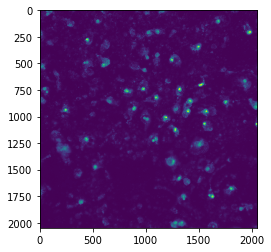

In [546]:
im = normalise(io.imread("/tmp/H - 05(fld 04 wv Green - dsRed).tif"))
im = im + normalise(io.imread("/tmp/H - 05(fld 04 wv Blue - FITC).tif"))
im = im + normalise(io.imread("/tmp/H - 05(fld 04 wv Red - Cy5).tif"))
im = im + normalise(io.imread("/tmp/H - 05(fld 04 wv UV - DAPI).tif")) # This seems a good enough way to combine the images
plt.imshow(normalise(im))

val = filters.threshold_otsu(im)
mask = im < val
mes = measure.label(mask, background=1)

In [548]:
oi = ndi.find_objects(mes)
for i in np.arange(len(oi))[::-1]:
    if oi[i][1].stop - oi[i][1].start < 20:
        del oi[i]
    elif oi[i][0].stop - oi[i][0].start < 20:
        del oi[i]

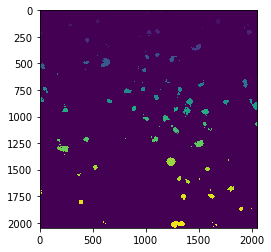

In [549]:
plt.imshow(mes)

63


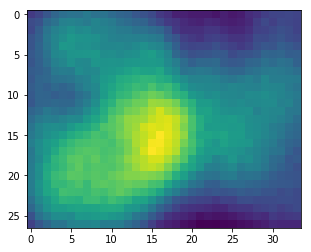

In [559]:
n = 2
#oi = ndi.find_objects(mes)
print(len(oi))
plt.imshow(normalise(im[oi[n]]))

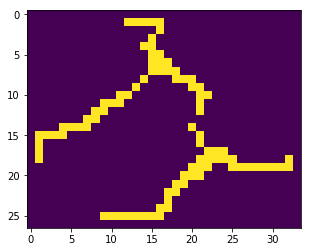

In [562]:
edged = feature.canny(normalise(im[oi[n]]), sigma=4)
plt.imshow(edged)

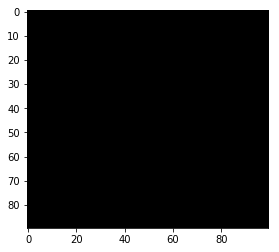

In [109]:
plt.imshow(edged[200:290,400:500], cmap=plt.cm.gray)

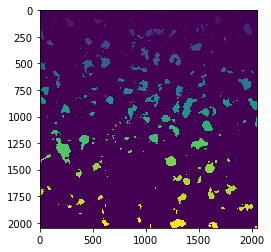

In [581]:
bb = normalise(im)
e_map = filters.sobel(bb)
markers = np.zeros_like(bb)
markers[bb < 0.05] = 1
markers[bb > 0.1] = 2
seg = watershed(e_map, markers)
seg = ndi.binary_fill_holes(seg - 1)
labeled, _ = ndi.label(seg)
plt.imshow(labeled)

In [103]:
def cropHeart(inp, inp2):
    """
    Crop the heart so that all the padding is done away with.
    Output cropped heart.
    """
    # argwhere will give you the coordinates of every point above smallest
    true_points = np.argwhere(inp)
    # take the smallest points and use them as the top left of your crop
    top_left = true_points.min(axis=0)
    # take the largest points and use them as the bottom right of your crop
    bottom_right = true_points.max(axis=0)
    out = inp2[top_left[0]:bottom_right[0]+1,  # plus 1 because slice isn't
          top_left[1]:bottom_right[1]+1]   # inclusive
    return out

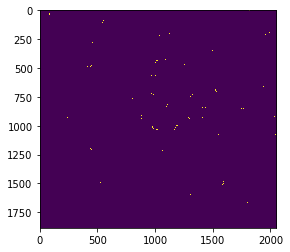

In [104]:
a = cropHeart(edged, edged)
plt.imshow(a)

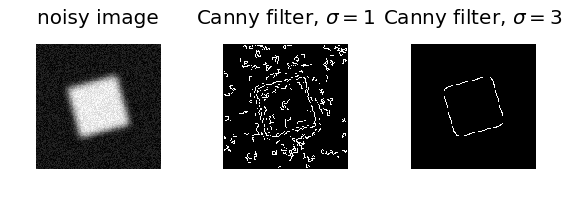

In [18]:
# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()
